# 3. INTERMEDIATE MACHINE LEARNING

# 3.5. CROSS VALIDATION

In [1]:
import pandas as pd

In [2]:
#  astuce pour afficher toutes les lignes sans les ...
pd.set_option('display.max_row', 80)
#  astuce pour afficher toutes les colonnes dans les head()
pd.set_option('display.max_column', 80)

## CHARGEMENT DES DATASETS FULL ET TEST

In [3]:
# Chargement des datasets
dataset_input_path = 'C:/Users/PC Maison/4-KAGGLE\KAGGLE_DEV/KAGGLE_COURS_3-MACHINE_LEARNING_INTERMEDIATE/'
train_data = pd.read_csv(dataset_input_path + 'home-data-for-ml-course/input/train.csv', index_col='Id')
test_data = pd.read_csv(dataset_input_path + 'home-data-for-ml-course/input/test.csv', index_col='Id')

## TARGET ET FEATURES

In [4]:
# Remove rows with missing target, separate target from predictors
train_data.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = train_data.SalePrice              
train_data.drop(['SalePrice'], axis=1, inplace=True)

# Select numeric columns only
numeric_cols = [cname for cname in train_data.columns if train_data[cname].dtype in ['int64', 'float64']]
X = train_data[numeric_cols].copy()
X_test = test_data[numeric_cols].copy()

## MODELISATION

In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

my_pipeline = Pipeline(steps=[
    ('preprocessor', SimpleImputer()),
    ('model', RandomForestRegressor(n_estimators=50, random_state=0))
])

In [6]:
from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(my_pipeline, X, y,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("Average MAE score:", scores.mean())

Average MAE score: 18276.410356164386


## FONCTION DE SCORING

In [7]:
def get_score(n_estimators):
    
    """Return the average MAE over 3 CV folds of random forest model.
    
    Keyword argument:
    n_estimators -- the number of trees in the forest
    """
    
    # Replace this body with your own code
    my_pipeline = Pipeline(steps=[
        ('preprocessor', SimpleImputer()),
        ('model', RandomForestRegressor(n_estimators, random_state=0))
    ])
    
    scores = -1 * cross_val_score(my_pipeline, X, y,
                                  cv=3,
                                  scoring='neg_mean_absolute_error')
    return scores.mean()

In [8]:
# utilisation de fonction de scoring sur 50, 100, 150,..., 300, 350, 400.
# results = {}
# for i in range(50,400,5):
#     results[i] = get_score(i)

In [9]:
# visualisation de la MAE en fonction de l'estimateur
# import matplotlib.pyplot as plt
# %matplotlib inline

# plt.plot(list(results.keys()), list(results.values()))
# plt.show()

In [11]:
# n_estimators_best = min(results, key=results.get)
# print(f'{n_estimators_best = }')

In [12]:
# utilisation de fonction de scoring sur 50, 100, 150,..., 300, 350, 400.
results = {}
for i in range(230,250,1):
    results[i] = get_score(i)

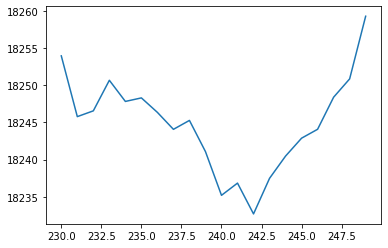

In [13]:
# visualisation de la MAE en fonction de l'estimateur
import matplotlib.pyplot as plt
# %matplotlib inline

plt.plot(list(results.keys()), list(results.values()))
plt.show()

In [14]:
n_estimators_best = min(results, key=results.get)
print(f'{n_estimators_best = }')

n_estimators_best = 242
